In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
df = pd.read_csv(r"preprocessed_data2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  3564 non-null   object 
 1   merchant               3564 non-null   object 
 2   category               3564 non-null   object 
 3   amt                    3564 non-null   float64
 4   city                   3564 non-null   object 
 5   state                  3564 non-null   object 
 6   lat                    3564 non-null   float64
 7   long                   3564 non-null   float64
 8   city_pop               3564 non-null   int64  
 9   job                    3564 non-null   object 
 10  age                    3564 non-null   int64  
 11  trans_num              3564 non-null   object 
 12  merch_lat              3564 non-null   float64
 13  merch_long             3564 non-null   float64
 14  is_fraud               3564 non-null   int64  
 15  day_

In [3]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,age,trans_num,merch_lat,merch_long,is_fraud,day_of_week
0,2019-09-14 03:29:08,Rau and Sons,grocery_pos,314.70,Glendale,CA,34.1556,-118.2322,172817,"Accountant, chartered",83,66a15820cdae4179f0b26819babd4eb3,33.283670,-118.654974,1,Sat
1,2020-01-22 06:51:03,"Connelly, Reichert and Fritsch",gas_transport,43.51,Mesa,ID,44.6255,-116.4493,129,Cartographer,59,a78de0cd54f3d932607fb930f3293610,45.456663,-116.555030,0,Wed
2,2019-01-27 23:12:15,Friesen Inc,shopping_pos,795.01,Parker Dam,CA,34.2980,-114.1560,126,Marketing executive,32,527fdf7cc53f7af2e820b8b6e3d2f595,34.922036,-113.901876,1,Sun
3,2020-02-23 14:41:52,"Mosciski, Ziemann and Farrell",shopping_net,8.25,Hooper,NE,41.6414,-96.5232,1745,"Engineer, automotive",51,2576de962e18a80ce49c97b63da91f43,42.557041,-96.231715,0,Sun
4,2020-02-23 23:21:29,Brown PLC,misc_net,715.01,Carroll,NE,42.2770,-97.1926,566,Metallurgist,49,cfa8f4168b3f3e03ed2b4b4e3bb5d494,42.175045,-97.983932,1,Sun


In [4]:
df = df.drop(['job', 'trans_num'], axis=1)
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,age,merch_lat,merch_long,is_fraud,day_of_week
0,2019-09-14 03:29:08,Rau and Sons,grocery_pos,314.70,Glendale,CA,34.1556,-118.2322,172817,83,33.283670,-118.654974,1,Sat
1,2020-01-22 06:51:03,"Connelly, Reichert and Fritsch",gas_transport,43.51,Mesa,ID,44.6255,-116.4493,129,59,45.456663,-116.555030,0,Wed
2,2019-01-27 23:12:15,Friesen Inc,shopping_pos,795.01,Parker Dam,CA,34.2980,-114.1560,126,32,34.922036,-113.901876,1,Sun
3,2020-02-23 14:41:52,"Mosciski, Ziemann and Farrell",shopping_net,8.25,Hooper,NE,41.6414,-96.5232,1745,51,42.557041,-96.231715,0,Sun
4,2020-02-23 23:21:29,Brown PLC,misc_net,715.01,Carroll,NE,42.2770,-97.1926,566,49,42.175045,-97.983932,1,Sun


In [6]:
df.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
age                        int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
day_of_week               object
dtype: object

In [7]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
age                               int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
day_of_week                      object
dtype: object

In [8]:
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,age,merch_lat,merch_long,is_fraud,day_of_week,year,month,day
0,2019-09-14 03:29:08,Rau and Sons,grocery_pos,314.70,Glendale,CA,34.1556,-118.2322,172817,83,33.283670,-118.654974,1,Sat,2019,9,14
1,2020-01-22 06:51:03,"Connelly, Reichert and Fritsch",gas_transport,43.51,Mesa,ID,44.6255,-116.4493,129,59,45.456663,-116.555030,0,Wed,2020,1,22
2,2019-01-27 23:12:15,Friesen Inc,shopping_pos,795.01,Parker Dam,CA,34.2980,-114.1560,126,32,34.922036,-113.901876,1,Sun,2019,1,27
3,2020-02-23 14:41:52,"Mosciski, Ziemann and Farrell",shopping_net,8.25,Hooper,NE,41.6414,-96.5232,1745,51,42.557041,-96.231715,0,Sun,2020,2,23
4,2020-02-23 23:21:29,Brown PLC,misc_net,715.01,Carroll,NE,42.2770,-97.1926,566,49,42.175045,-97.983932,1,Sun,2020,2,23


In [9]:
df.describe()

,trans_date_trans_time,amt,lat,long,city_pop,age,merch_lat,merch_long,is_fraud,year,month,day
count,3564,3564.000000,3564.000000,3564.000000,3.564000e+03,3564.000000,3564.000000,3564.000000,3564.00000,3564.000000,3564.000000,3564.000000
mean,2019-12-27 12:01:39.398428672,292.928490,39.936028,-111.065367,1.179566e+05,54.425365,39.921045,-111.075074,0.50000,2019.468575,6.733726,15.905724
min,2019-01-01 00:22:36,1.050000,20.027100,-165.672300,4.600000e+01,23.000000,19.078440,-166.651656,0.00000,2019.000000,1.000000,1.000000
25%,2019-07-03 23:32:51,19.827500,36.715400,-120.646600,5.090000e+02,40.000000,36.724523,-120.498411,0.00000,2019.000000,4.000000,8.000000
50%,2019-12-19 17:30:01.500000,90.845000,39.741700,-111.794100,1.645000e+03,52.000000,39.682099,-111.421038,0.50000,2019.000000,7.000000,15.000000
75%,2020-06-23 19:43:31.500000,373.605000,42.277000,-99.384400,3.570500e+04,67.000000,42.320819,-99.672526,1.00000,2020.000000,10.000000,24.000000
max,2020-12-31 20:48:16,1371.810000,66.693300,-89.628700,2.383912e+06,97.000000,67.510267,-88.646366,1.00000,2020.000000,12.000000,31.000000
std,NaN,362.321909,5.606036,13.380987,3.143559e+05,17.919732,5.652903,13.409414,0.50007,0.499081,3.457951,8.840818


In [10]:
#check for missing values
missing_values = df.isnull().sum()
print("Columns with Missing Values:", missing_values[missing_values > 0])

Columns with Missing Values: Series([], dtype: int64)


In [11]:
#check for duplicates
dup_rows = df[df.duplicated()]
print("duplicates rows:", dup_rows)

duplicates rows: Empty DataFrame
Columns: [trans_date_trans_time, merchant, category, amt, city, state, lat, long, city_pop, age, merch_lat, merch_long, is_fraud, day_of_week, year, month, day]
Index: []


In [17]:
cate_var = ['merchant', 'category']
for col in cate_var:
    print(df[col].value_counts())

merchant
Romaguera, Cruickshank and Greenholt    24
Kiehn-Emmerich                          22
Kerluke-Abshire                         21
Kilback LLC                             20
McDermott-Weimann                       19
                                        ..
Rutherford, Homenick and Bergstrom       1
Hartmann, Rowe and Hermann               1
Hoppe, Harris and Bedn                   1
Bins-Tillman                             1
Smitham-Schille                          1
Name: count, Length: 665, dtype: int64
category
grocery_pos       596
shopping_net      535
shopping_pos      344
gas_transport     326
misc_net          312
home              223
kids_pets         217
personal_care     193
entertainment     189
food_dining       163
health_fitness    152
misc_pos          141
grocery_net        93
travel             80
Name: count, dtype: int64


C:\Users\mutha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


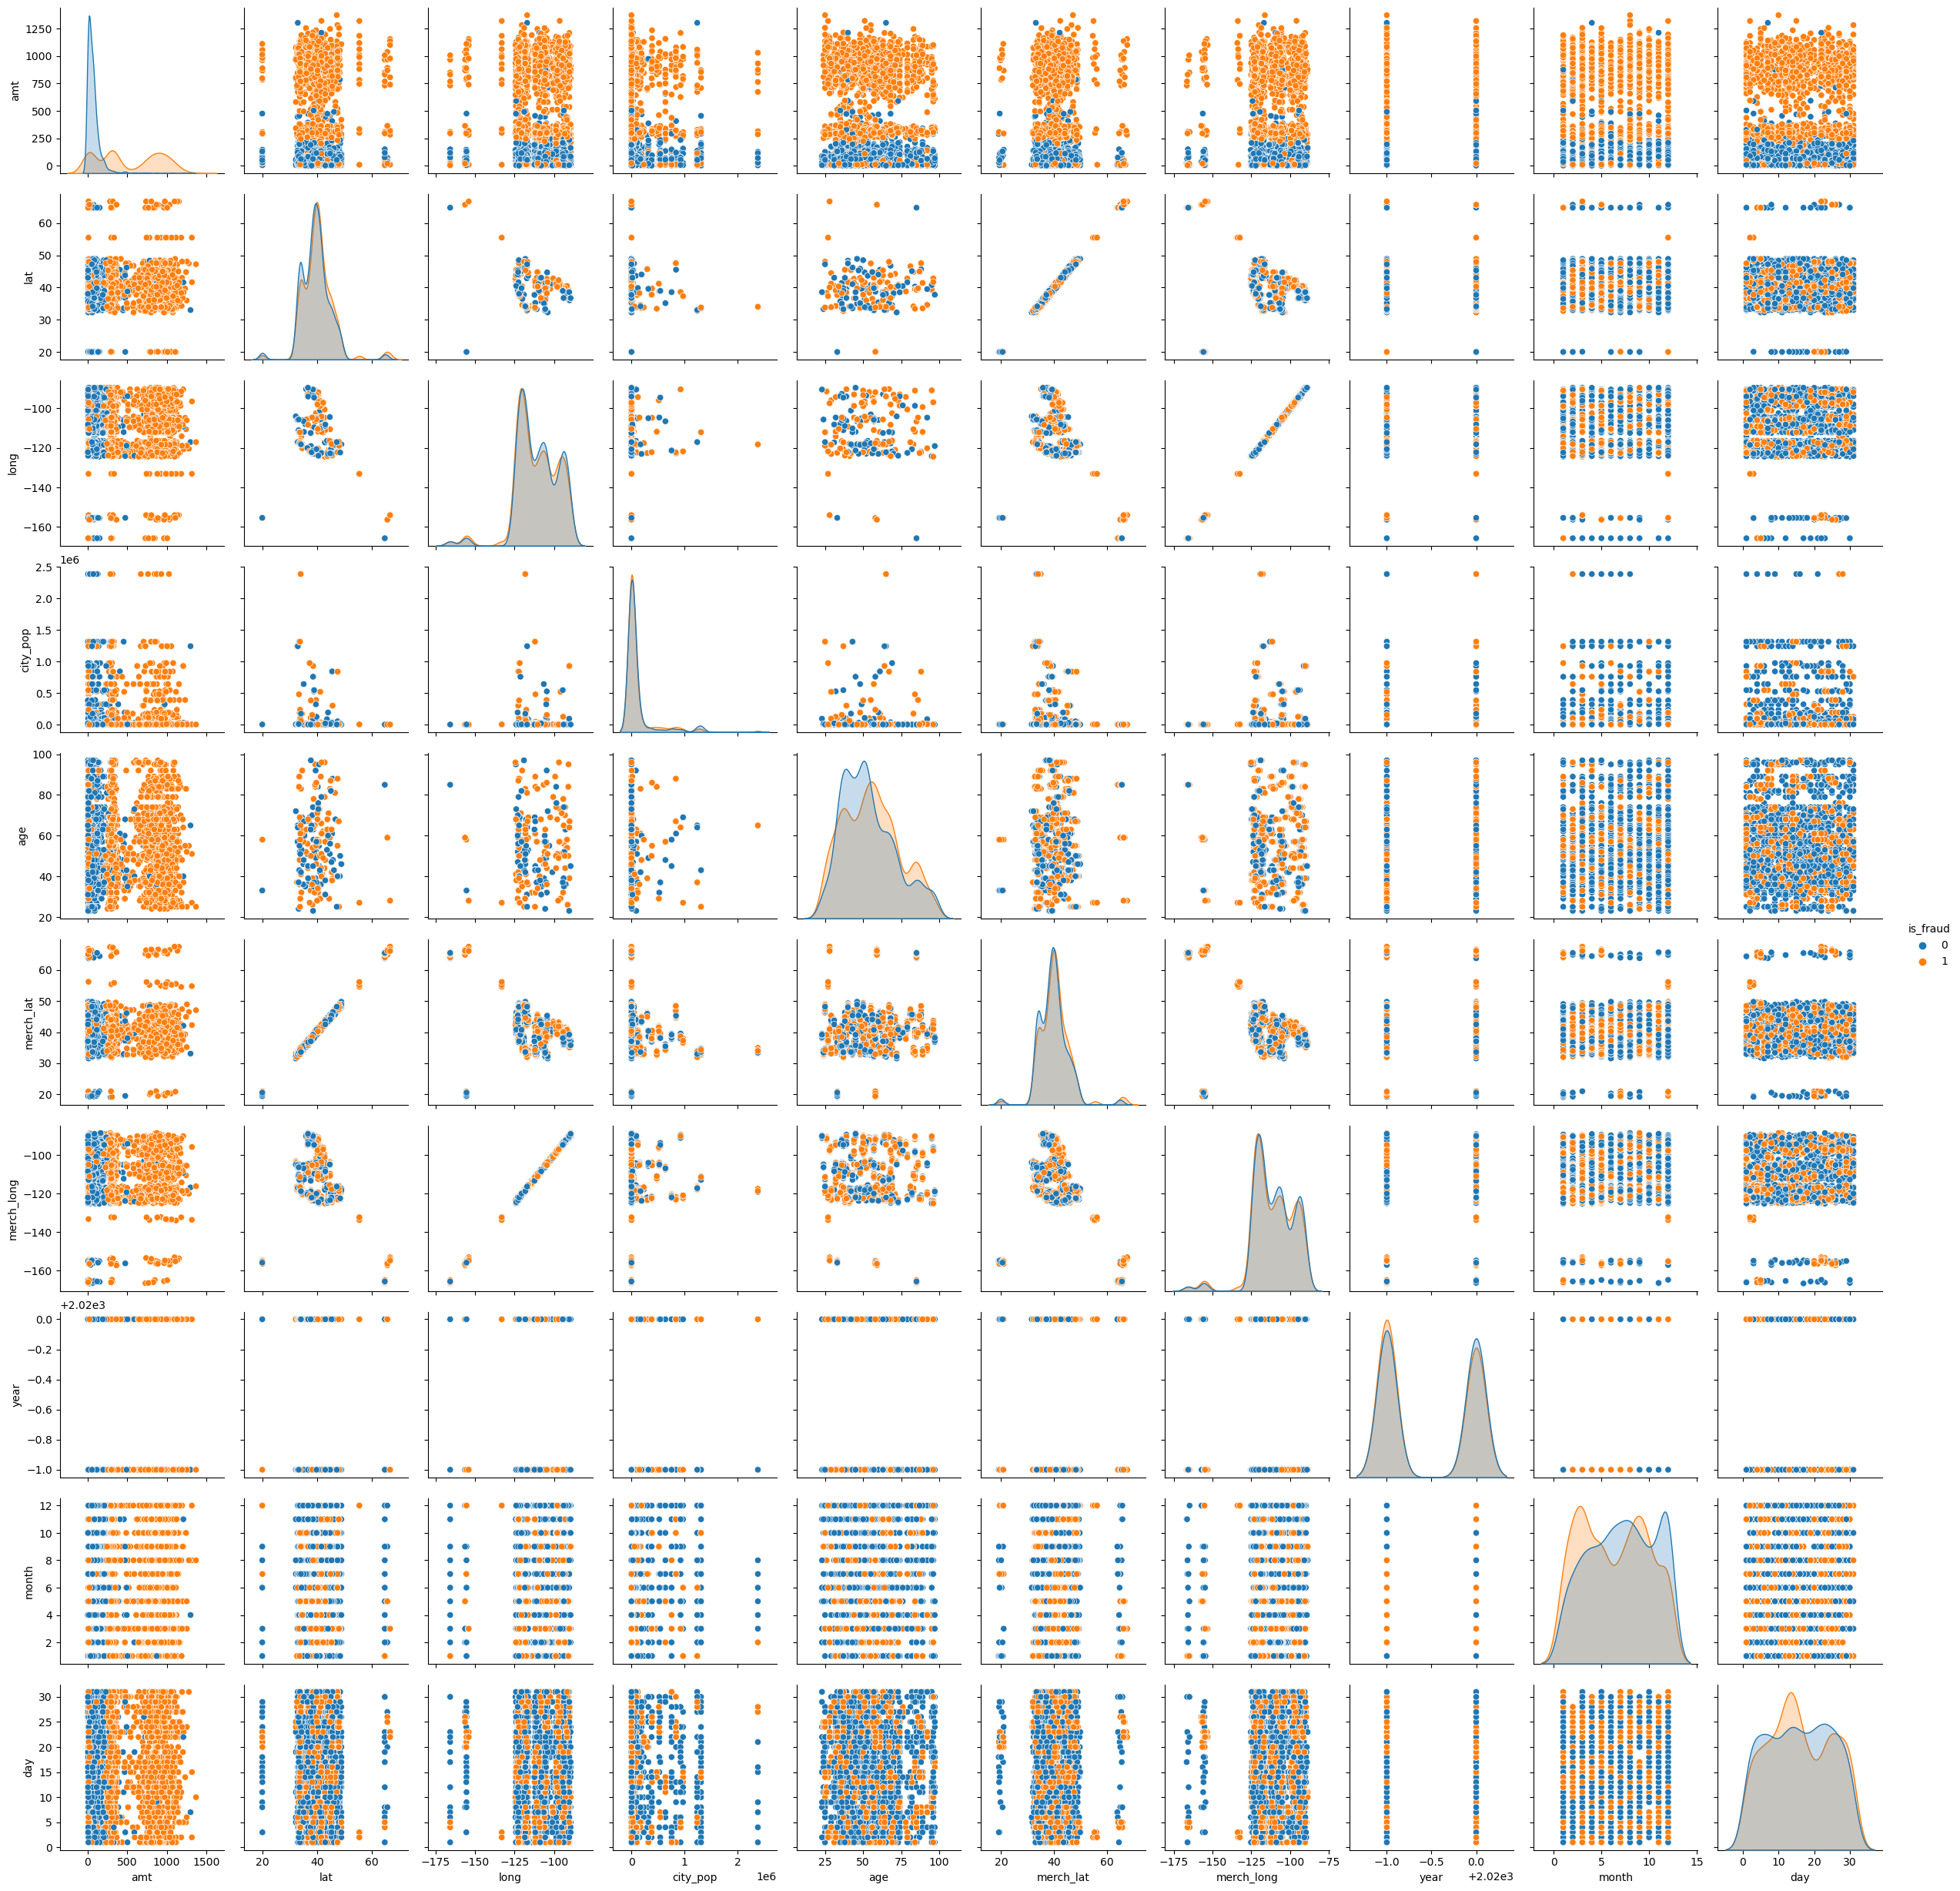

In [18]:
sns.pairplot(df, hue='is_fraud')

[Text(0, 0.5, 'amt'),
 Text(0, 1.5, 'lat'),
 Text(0, 2.5, 'long'),
 Text(0, 3.5, 'city_pop'),
 Text(0, 4.5, 'age'),
 Text(0, 5.5, 'merch_lat'),
 Text(0, 6.5, 'merch_long'),
 Text(0, 7.5, 'is_fraud'),
 Text(0, 8.5, 'year'),
 Text(0, 9.5, 'month'),
 Text(0, 10.5, 'day')]

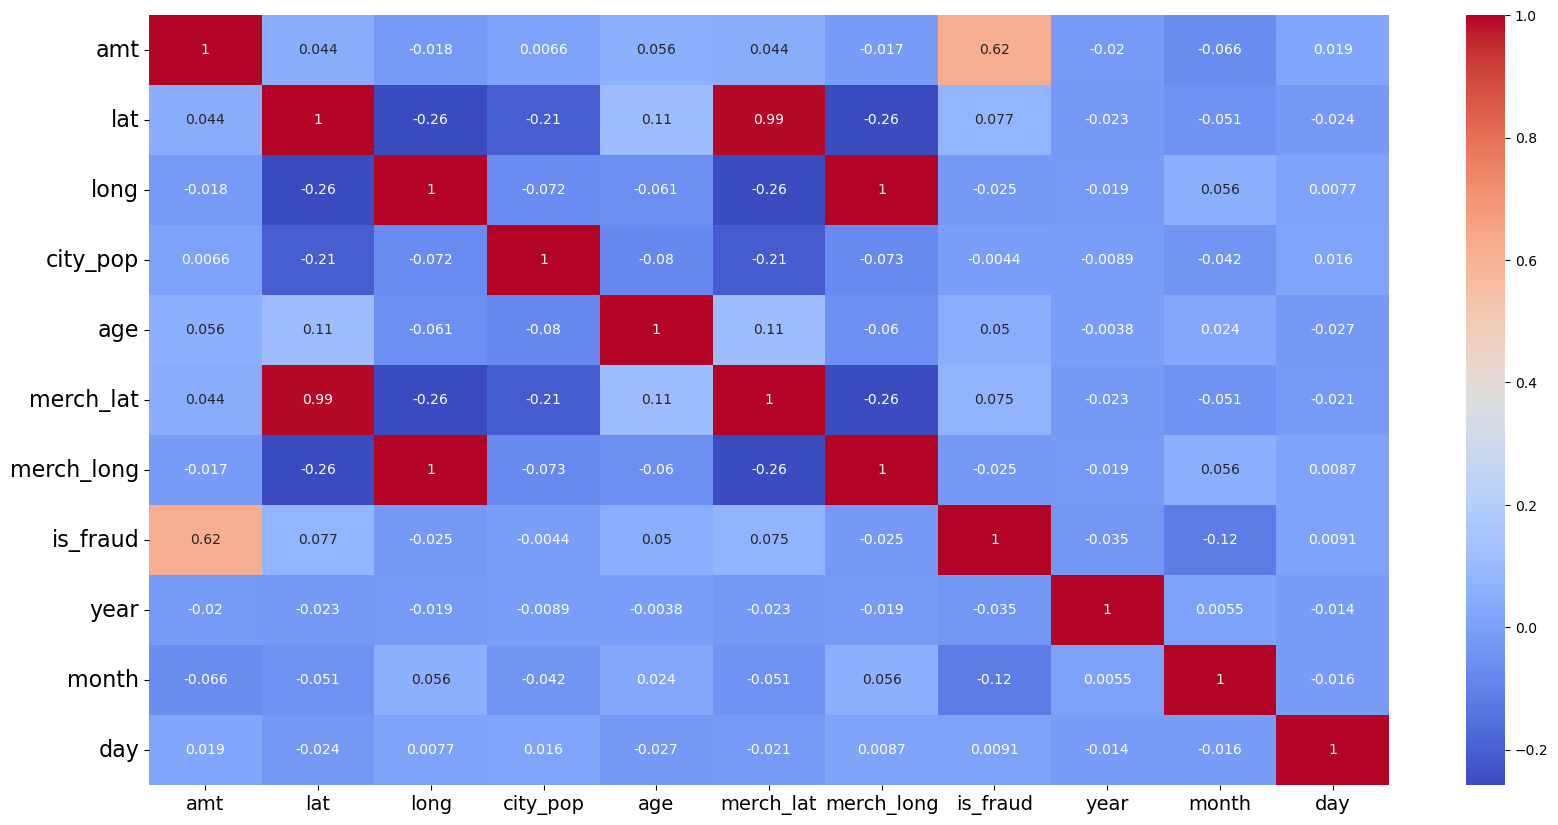

In [22]:
plt.figure(figsize=(20,10))
coolwarm_cmap = sns.color_palette("coolwarm", as_cmap=True)
heatmap = sns.heatmap(df[['amt', 'lat', 'long', 'city_pop', 'age', 'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day']].corr(), annot=True, cmap=coolwarm_cmap)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)

<Axes: xlabel='is_fraud', ylabel='amt'>

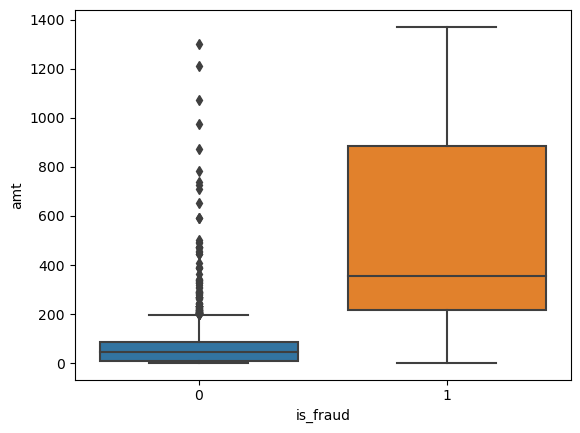

In [29]:
sns.boxplot(x='is_fraud', y='amt', data=df)

The significant difference in transaction amounts between fraudulent and non-fraudulent transactions could indicate that fraudsters tend to target transactions with specific amounts.

The presence of a high range of outliers in non-fraudulent transactions suggests that there are occasional transactions with unusually high or low amounts within the legitimate transaction data. This could be due to a variety of factors, such as large one-time purchases, errors in data entry, or special promotions.

<Axes: xlabel='is_fraud', ylabel='city_pop'>

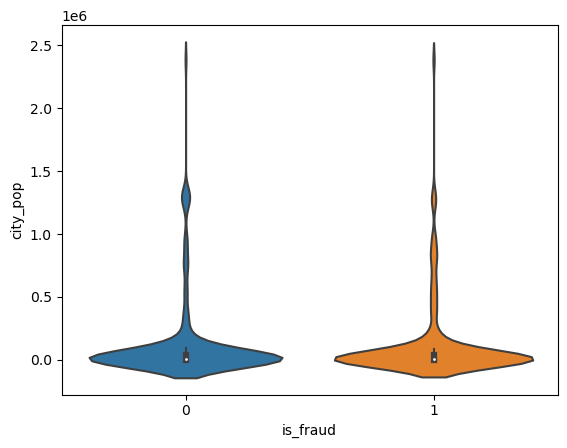

In [36]:
sns.violinplot(x='is_fraud', y='city_pop', data=df)

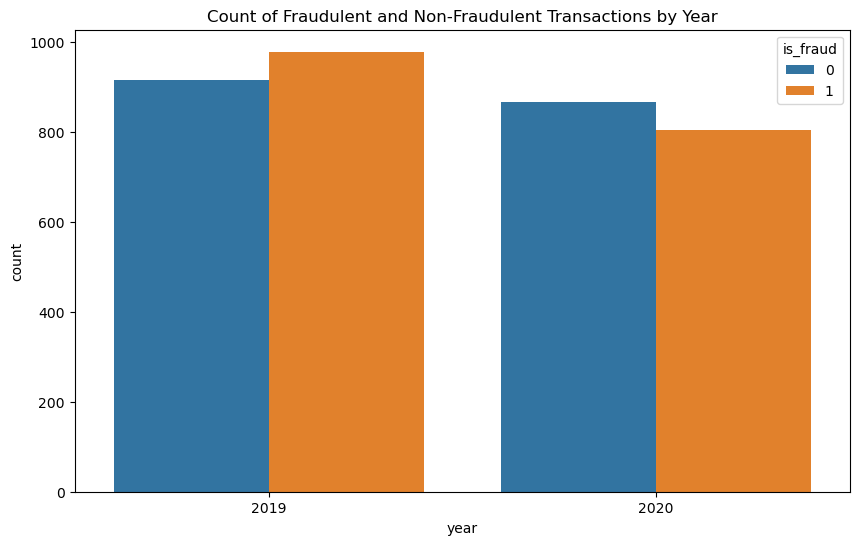

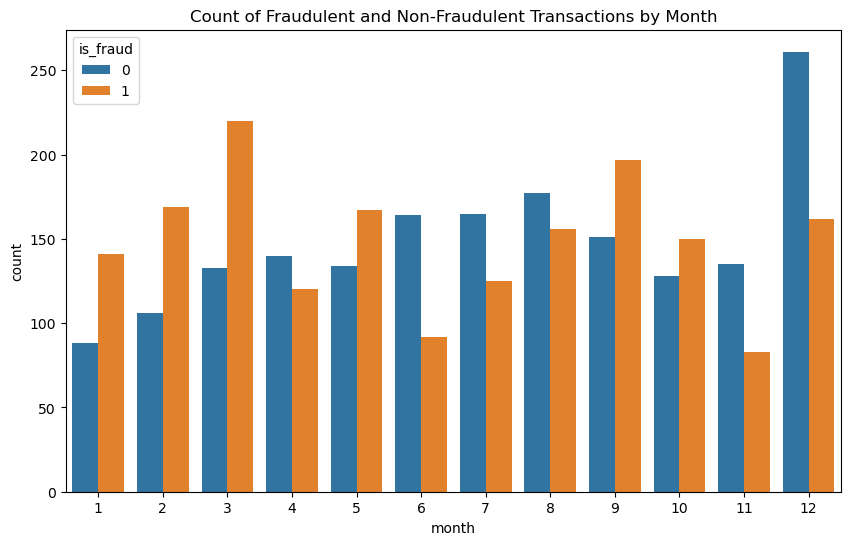

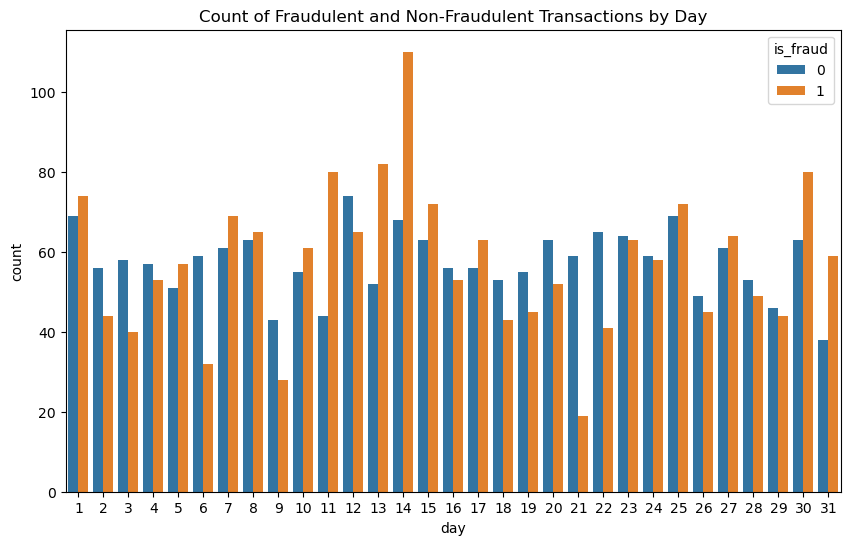

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='is_fraud', data=df)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Year')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='is_fraud', data=df)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Month')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='day', hue='is_fraud', data=df)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Day')
plt.show()

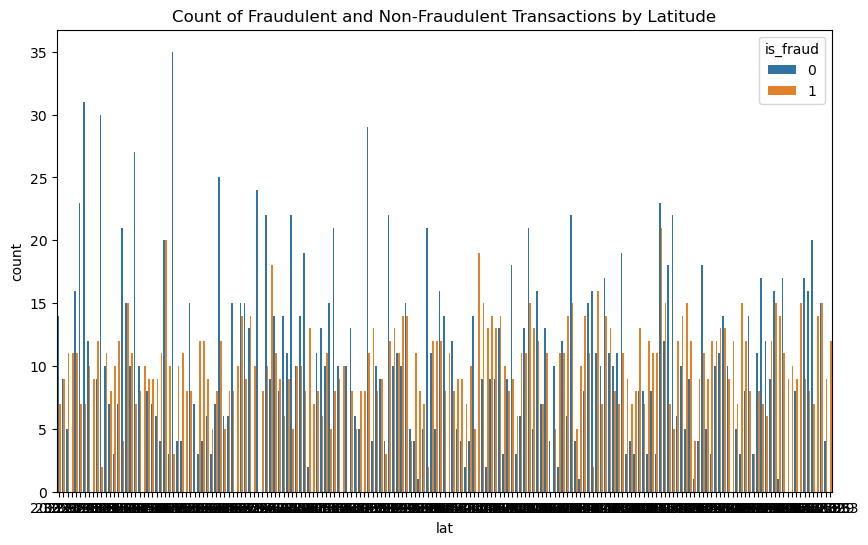

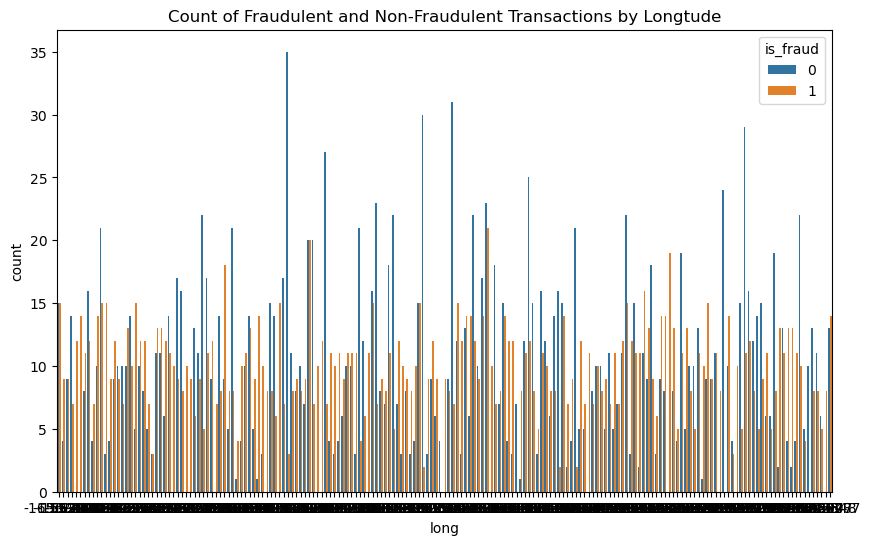

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='lat', hue='is_fraud', data=df)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Latitude')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='long', hue='is_fraud', data=df)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Longtude')
plt.show()

In [51]:
df['customer_id'] = df['merchant'] + '_' + df['city'] + '_' + df['state']
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,age,merch_lat,merch_long,is_fraud,day_of_week,year,month,day,customer_id
0,2019-09-14 03:29:08,Rau and Sons,grocery_pos,314.70,Glendale,CA,34.1556,-118.2322,172817,83,33.283670,-118.654974,1,Sat,2019,9,14,Rau and Sons_Glendale_CA
1,2020-01-22 06:51:03,"Connelly, Reichert and Fritsch",gas_transport,43.51,Mesa,ID,44.6255,-116.4493,129,59,45.456663,-116.555030,0,Wed,2020,1,22,"Connelly, Reichert and Fritsch_Mesa_ID"
2,2019-01-27 23:12:15,Friesen Inc,shopping_pos,795.01,Parker Dam,CA,34.2980,-114.1560,126,32,34.922036,-113.901876,1,Sun,2019,1,27,Friesen Inc_Parker Dam_CA
3,2020-02-23 14:41:52,"Mosciski, Ziemann and Farrell",shopping_net,8.25,Hooper,NE,41.6414,-96.5232,1745,51,42.557041,-96.231715,0,Sun,2020,2,23,"Mosciski, Ziemann and Farrell_Hooper_NE"
4,2020-02-23 23:21:29,Brown PLC,misc_net,715.01,Carroll,NE,42.2770,-97.1926,566,49,42.175045,-97.983932,1,Sun,2020,2,23,Brown PLC_Carroll_NE


In [52]:
transaction_frequency = df.groupby('customer_id')['trans_date_trans_time'].count()

# Optionally, you can also calculate average transaction frequency
average_transaction_frequency = transaction_frequency.mean()

print("Transaction Frequency per Customer:")
print(transaction_frequency)

print("\nAverage Transaction Frequency:", average_transaction_frequency)

Transaction Frequency per Customer:
customer_id
Abbott-Rogahn_Centerview_MO           1
Abbott-Rogahn_Howells_NE              1
Abbott-Rogahn_Phoenix_AZ              1
Abbott-Rogahn_Smith River_CA          1
Abbott-Steube_Bay City_OR             1
                                     ..
Zieme, Bode and Dooley_Thompson_UT    1
Zulauf LLC_Fullerton_NE               1
Zulauf LLC_Littleton_CO               1
Zulauf LLC_Newhall_CA                 1
Zulauf LLC_Paradise Valley_AZ         1
Name: trans_date_trans_time, Length: 3489, dtype: int64

Average Transaction Frequency: 1.0214961306964747
